<a href="https://colab.research.google.com/github/sanhiitaa/100-days-of-deep-learning/blob/main/cats_vs_dogs_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 24.6MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.5MB/s]


In [3]:
import zipfile
zr= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zr.extractall('/content')
zr.close()

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
# generators - divides a large dataset into small batches, so that the RAM does not overload.
train_ds= keras.utils.image_dataset_from_directory(directory= '/content/train',
                                                   labels='inferred',
                                                   label_mode = 'int',
                                                   batch_size=32,
                                                   image_size=(256,256))

validation_ds= keras.utils.image_dataset_from_directory(directory= '/content/test',
                                                        labels='inferred',
                                                        label_mode = 'int',
                                                        batch_size=32,
                                                        image_size=(256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


The images are stored in the form of a numpy array, with values from 0-254.


In [6]:
# normalizing the images

def normalize(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds= train_ds.map(normalize)
validation_ds= validation_ds.map(normalize)

# CNN Model

In [7]:
model= Sequential()

# 1st convolution layer
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# 2nd convolution layer
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# 3rd convolution layer
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# flatten layer
model.add(Flatten())

# FCNN
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history= model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 63s 87ms/step - loss: 0.6329 - accuracy: 0.6416 - val_loss: 0.5285 - val_accuracy: 0.7456
Epoch 2/10
625/625 [==============================] - 55s 87ms/step - loss: 0.4852 - accuracy: 0.7634 - val_loss: 0.4705 - val_accuracy: 0.7780
Epoch 3/10
625/625 [==============================] - 54s 85ms/step - loss: 0.3856 - accuracy: 0.8260 - val_loss: 0.4875 - val_accuracy: 0.7850
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2507 - accuracy: 0.8959 - val_loss: 0.6774 - val_accuracy: 0.7718
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1413 - accuracy: 0.9450 - val_loss: 0.7556 - val_accuracy: 0.7774
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0867 - accuracy: 0.9686 - val_loss: 1.1068 - val_accuracy: 0.7686
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0538 - accuracy: 0.9818 - val_loss: 1.2848 - val_accuracy:

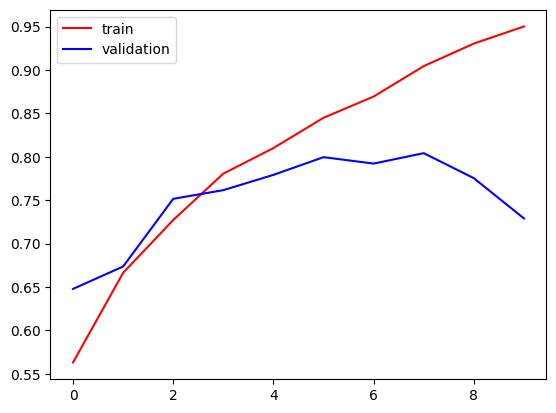

In [12]:


plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

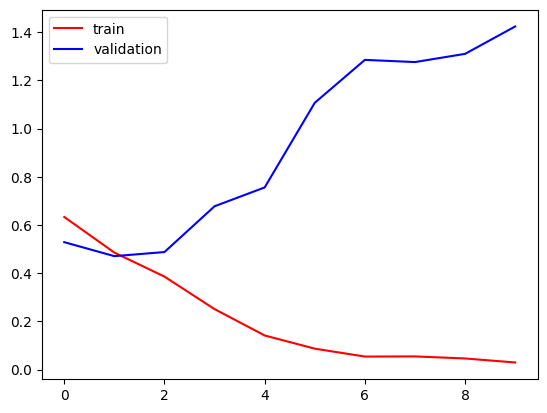

In [12]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

Overfitting

In [ ]:
# way to reduce overfitting
# add more data
# data augmentation
# l1/l2 regularization
# dropout
# batch norm
# reduce complexity

# CNN Model with Batch Normalization

In [7]:
model= Sequential()

# 1st convolution layer
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# 2nd convolution layer
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# 3rd convolution layer
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# flatten layer
model.add(Flatten())

# FCNN
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history= model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 108ms/step - loss: 1.3371 - accuracy: 0.5587 - val_loss: 0.6574 - val_accuracy: 0.5900
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6198 - accuracy: 0.6532 - val_loss: 0.5649 - val_accuracy: 0.7222
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5319 - accuracy: 0.7260 - val_loss: 0.5322 - val_accuracy: 0.7296
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4565 - accuracy: 0.7768 - val_loss: 0.4486 - val_accuracy: 0.7856
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4232 - accuracy: 0.7980 - val_loss: 0.4701 - val_accuracy: 0.7664
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3653 - accuracy: 0.8317 - val_loss: 0.4874 - val_accuracy: 0.7762
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3101 - accuracy: 0.8537 - val_loss: 0.4059 - val_ac

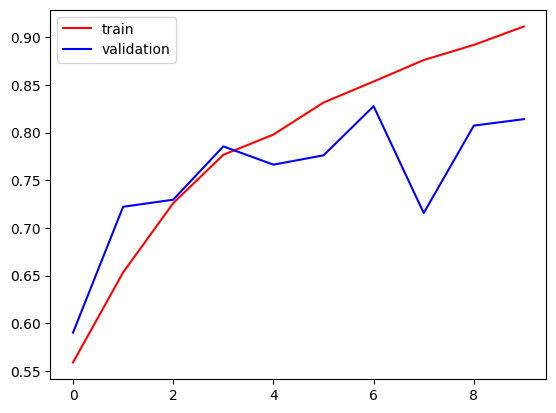

In [12]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

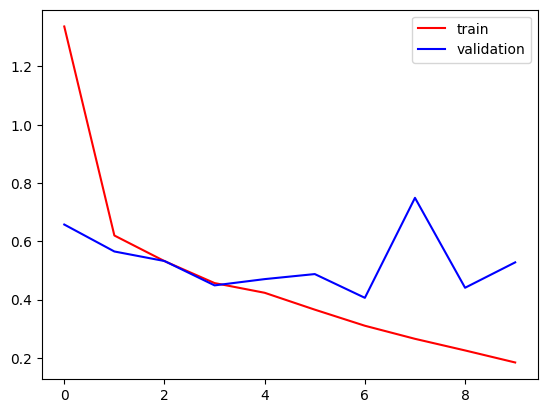

In [13]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

# Testing the model

In [14]:
import cv2

Testing for Cat

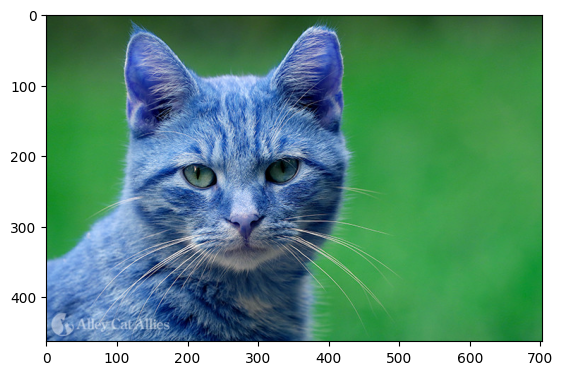

In [16]:
test_img= cv2.imread('/content/cat.jpg')
plt.imshow(test_img)

In [17]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3)) #as the pictures are feeded to the model in batches, this image has to be sent in the same format as a batch, so (1,256,256,3) indicates, a batch with 1 image of size 256x256x3

In [18]:
model.predict(test_input)

1/1 [==============================] - 0s 403ms/step


array([[1.]], dtype=float32)

Predicted the image to be of a dog (1) which is incorrect.

Testing for Dog

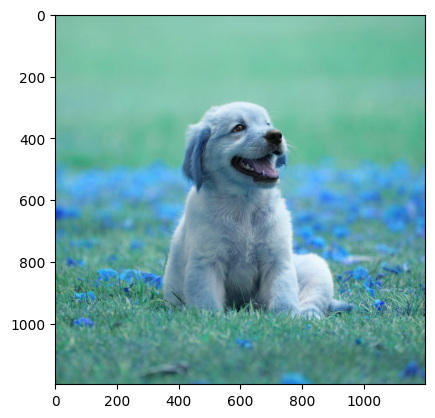

In [20]:
test_img= cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [21]:
test_img= cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [22]:
model.predict(test_input)

1/1 [==============================] - 0s 16ms/step


array([[1.]], dtype=float32)

Predicted the image to be of a dog (1) which is correct.

Trying another cat image

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

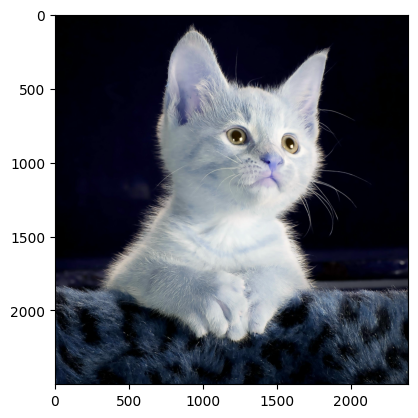

In [23]:
test_img= cv2.imread('/content/cat2.jpg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

Predicted the image to be of a cat (0) which is correct.